# Get lemmas of articles

In [1]:
import lib as l
import lib.utils as U
import lib.constants as C
import lib.keywords as KW
import lib.lemmas as SP
import lib.plots as PL

### 1. Load data

In [2]:
kw_dict = C.ELECTRIC_LIGHT
kw = "electric light"

In [3]:
keywords_fr =  kw_dict["fr"]

df_figaro = U.load_df("France")
df_figaro_kw = KW.get_keyword_df(df_figaro, keywords_fr, "fr", isAnd=True)

Loaded data from France, took 1.521 minutes
Dataset has size (28502, 2) and columns ['date' 'text']
Filtering for words ['lumiere', 'electrique'] done, took 3.046 minutes
Size is (940, 2).


TypeError: 'in <string>' requires string as left operand, not list

In [4]:
keywords_sp =  kw_dict["sp"]

df_imparcial = U.load_df("Spain")
df_imparcial_kw = KW.get_keyword_df(df_imparcial, keywords_sp, "sp", isAnd=True)

Loaded data from Spain, took 1.189 minutes
Dataset has size (23008, 2) and columns ['date' 'text']
Filtering for words ['luz', 'electrica'] done, took 1.965 minutes
Size is (1256, 2).


TypeError: 'in <string>' requires string as left operand, not list

In [5]:
keywords_eng = kw_dict["eng"]

df_nyh = U.load_df("USA")
df_nyh_kw = KW.get_keyword_df(df_nyh, keywords_eng, "eng", isAnd=True)

Loaded data from USA, took 5.357 minutes
Dataset has size (147709, 3) and columns ['date' 'text' 'height']
Filtering for words ['electric', 'light'] done, took 33.306 seconds
Size is (1822, 3).


TypeError: 'in <string>' requires string as left operand, not list

In [6]:
keywords_ger = kw_dict["ger"]

df_nhz = U.load_df("Hamburg")
df_nhz_kw = KW.get_keyword_df(df_nhz, keywords_ger, "ger", isAnd=True)

Loaded data from Hamburg, took 4.022 minutes
Dataset has size (379671, 3) and columns ['date' 'text' 'height']
Filtering for words ['elektrisch', 'licht'] done, took 1.658 minutes
Size is (8, 3).


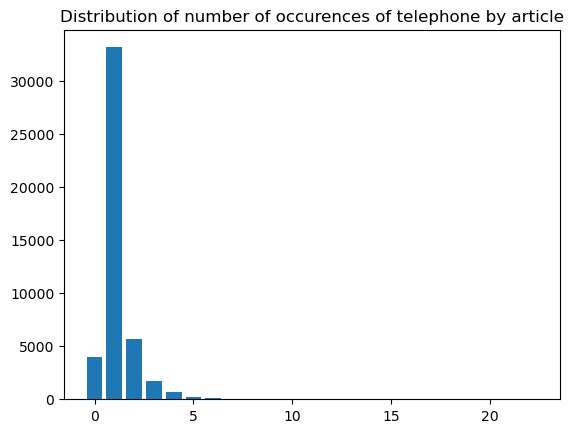

In [9]:
l.PL.plot_occurences(df_nhz_kw, kw, ["telephon", "telefon"])

In [16]:
df_nyh_kw = df_nyh_kw.loc[df_nyh_kw.num_of_iron > 1]

### 2. Run Spacy

In [17]:
df_figaro_kw = SP.process_df(df_figaro_kw, 25, "fr")

30729


In [18]:
df_imparcial_kw = SP.process_df(df_imparcial_kw, 25, "sp")

15413


In [19]:
df_nyh_kw = SP.process_df(df_nyh_kw, 25, "eng")

49632


In [10]:
df_nhz_kw = SP.process_df(df_nhz_kw, 25, "ger")

45791


### 3. Store dataframes

In [11]:
def drop_columns(df, kw):
    if "text" in df.columns.values:
        df = df.drop(columns=["text"])
    if "height" in df.columns.values:
        df = df.drop(columns=["height"])
    if "num_of_" + kw in df.columns.values:
        df = df.drop(columns=["num_of_" + kw])
    return df

In [22]:
df_figaro_kw = drop_columns(df_figaro_kw, kw)
U.compress(df_figaro_kw, U.get_keyword_dataframe_name("fr", kw, is_parent=True))

In [23]:
df_imparcial_kw = drop_columns(df_imparcial_kw, kw)
U.compress(df_imparcial_kw, U.get_keyword_dataframe_name("sp", kw, is_parent=True))

In [24]:
df_nyh_kw = drop_columns(df_nyh_kw, kw)
U.compress(df_nyh_kw, U.get_keyword_dataframe_name("eng", kw, is_parent=True))

In [12]:
df_nhz_kw = drop_columns(df_nhz_kw, kw)
U.compress(df_nhz_kw, U.get_keyword_dataframe_name("ger", kw, is_parent=True))

### Analyse results

In [20]:
gasoline_figaro = l.pd.read_csv("data/keyword_dfs/telephone/df_figaro_telephone.zip")

In [21]:
gasoline_imparcial = l.pd.read_csv("data/keyword_dfs/telephone/df_imparcial_telephone.zip")

In [22]:
gasoline_nhz = l.pd.read_csv("data/keyword_dfs/telephone/df_nhz_telephone.zip")

In [23]:
gasoline_nyh = l.pd.read_csv("data/keyword_dfs/telephone/df_nyh_telephone.zip")

In [27]:
len(gasoline_nyh)

18265

In [ ]:
len

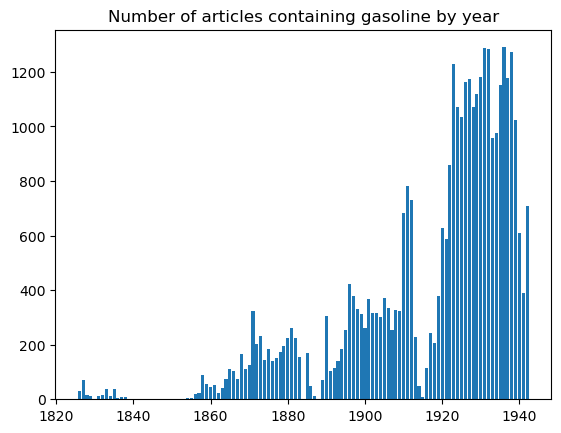

In [17]:
PL.plot_articles_over_time(df_figaro_kw, kw)

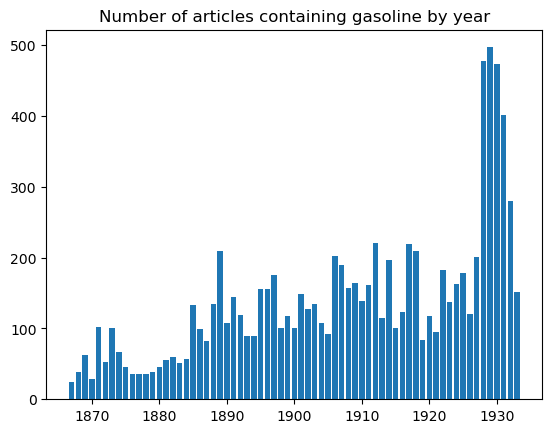

In [19]:
PL.plot_articles_over_time(df_imparcial_kw, kw)

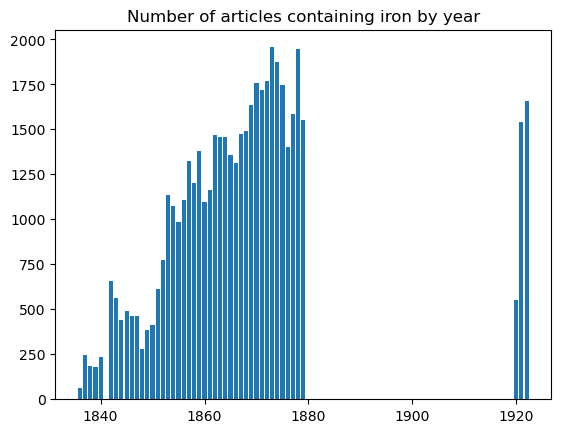

In [26]:
PL.plot_articles_over_time(df_nyh_kw, kw)

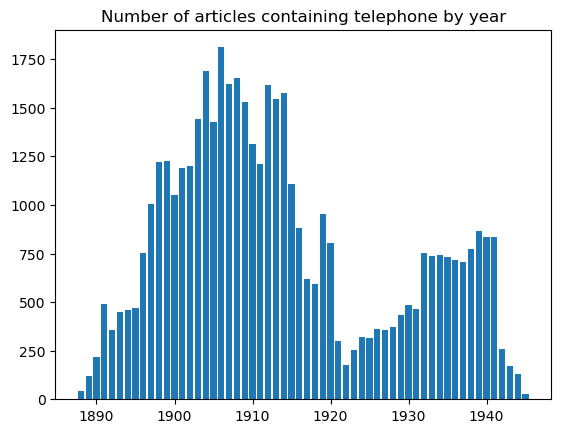

In [13]:
PL.plot_articles_over_time(df_nhz_kw, kw)